## Proyecto final
### Supermercado

**Equipo**
* Amaris Aglahel Cerda Porras
* María Fernanda Coronado Alejos
* Daniela Lizeth Guzmán Vázquez
* Ana Gabriela López Reyes
* Adair Eliseo Rojas Oaxaca

***Importamos librerías***

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

***Funciones para el desarrollo del proyecto***

In [11]:

'''
  Función para encontrar el vértice con el valor de distancia mínimo 
  del conjunto de vértices que aún están en la cola
'''
def minDistance(dist,queue):
    minimum = float("Inf")
    min_index = -1

    for i in range(len(dist)):
        if dist[i] < minimum and i in queue:
            minimum = dist[i]
            min_index = i
    return min_index


'''
  Función que retorna la lista de nodos del camino más corto desde
  el origen hasta j
'''
def getPath(parent, j, path=None):
    if parent[j] == -1 :
        return [j]
    return getPath(parent , parent[j]) + [j]


'''
  Función que implementa el algoritmo de camino más corto de origen
  único de Dijkstra para un gráfico representado mediante una matriz
  de adyacencia
'''
def dijkstra(graph, src, end):
    row = len(graph)
    col = len(graph[0])
    dist = [float("Inf")] * row
    parent = [-1] * row
    dist[src] = 0

    queue = []
    for i in range(row):
        queue.append(i)

    while queue:
        u = minDistance(dist,queue)   
        queue.remove(u)
        for i in range(col):
            if graph[u][i] and i in queue:
                if dist[u] + graph[u][i] < dist[i]:
                    dist[i] = dist[u] + graph[u][i]
                    parent[i] = u
        if u == end:
            return dist[end], getPath(parent,end)
        
        
'''
  Función que retorna el camino más corto desde el nodo 0, pasando
  por todos los nodos en la lista.
  - Parámetros:
    g: Grafo en forma de matriz de adyacencia
    nodes: lista de nodos por los que se pasará (lista de compras)
'''
def shorterPath(g, nodes):
    
    # Nodo inicial
    init_node = 0
    
    resultPath = []
    resultDist = 0
    
    aux_p = []
    aux_d = []
    for n in nodes:
        d, p = dijkstra(g, 0, n)
        aux_d.append(d)
        aux_p.append(p)
    
    i = aux_d.index(min(aux_d))
    resultPath.append(aux_p[i])
    resultDist = resultDist + aux_d[i]
    
    def _shorterPath(g, nodes):
        _resultPath = []
        _resultDist = []
        for n_i in nodes:
            aux_p = []
            aux_d = []
            
            for n_e in nodes:
                if n_i != n_e:
                    d, p = dijkstra(g,n_i,n_e)
                    aux_d.append(d)
                    aux_p.append(p)
                    
            i = aux_d.index(min(aux_d))
            
            nodes_last = nodes.copy()
            del nodes_last[i]
            
            nodes_last = []
            for x in nodes:
                if x != aux_p[i][-1]:
                    nodes_last.append(x)
            
            if len(nodes_last) > 1:
                d, p = _shorterPhat(g, nodes_last)
                _resultPath.append([aux_p[i],p])
                _resultDist.append(aux_d[i]+d)
            else:
                _resultPath.append(aux_p[i])
                _resultDist.append(aux_d[i])
            
        i = _resultDist.index(min(_resultDist))
        
        return _resultDist[i], _resultPath[i]
    
    d, p = _shorterPath(g, nodes)
    resultPath.append(p)
    resultDist = resultDist + d
    return resultDist, resultPath


'''
  Función para obtener las aristas
'''
def getEdgesFromList(L):
    edges = []
    for i in range(len(L)):
        if type(L[i]) == list:
            edges = edges + getEdgesFromList(L[i])
        else:
            if i != len(L)-1:
                edges.append((L[i],L[i+1]))
    return edges 


***Supermercado #1***

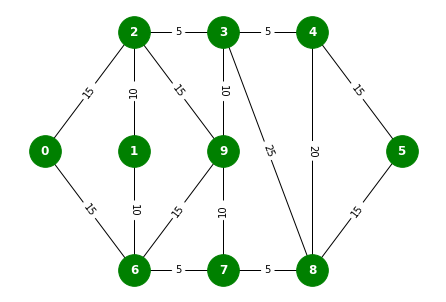

In [14]:

'''
    Supermercado No. 1
    [[ 0,  0, 15,  0,  0,  0, 15,  0,  0,  0],
     [ 0,  0, 10,  0,  0,  0, 10,  0,  0,  0],
     [15, 10,  0,  5,  0,  0,  0,  0,  0, 15],
     [ 0,  0,  5,  0,  5,  0,  0,  0, 25, 10],
     [ 0,  0,  0,  5,  0, 15,  0,  0, 20,  0],
     [ 0,  0,  0,  0, 15,  0,  0,  0, 15,  0],
     [15, 10,  0,  0,  0,  0,  0,  5,  0, 15],
     [ 0,  0,  0,  0,  0,  0,  5,  0,  5, 10],
     [ 0,  0,  0, 25, 20, 15,  0,  5,  0,  0],
     [ 0,  0, 15, 10,  0,  0, 15, 10,  0,  0]]

     0: Entrada
     1: Ropa Dama
     2: Panadería
     3: Limpieza
     4: Carnes y embutidos
     5: Lacteos
     6: Multimedia
     7: Electrodomesticos
     8: Frutas y verduras
     9: Ropa
'''

G = nx.Graph()

# Se declaran las posiciones de los nodos
G.add_node(0, pos = (0, 1))
G.add_node(1, pos = (1, 1))
G.add_node(2, pos = (1, 2))
G.add_node(3, pos = (2, 2))
G.add_node(4, pos = (3, 2))
G.add_node(5, pos = (4, 1))
G.add_node(6, pos = (1, 0))
G.add_node(7, pos = (2, 0))
G.add_node(8, pos = (3, 0))
G.add_node(9, pos = (2, 1))

# Se declaran los vertices y el peso
G.add_edge(0, 2, weight = 15)
G.add_edge(0, 6, weight = 15)
G.add_edge(2, 3, weight = 5)
G.add_edge(3, 4, weight = 5)
G.add_edge(4, 5, weight = 15)
G.add_edge(6, 7, weight = 5)
G.add_edge(7, 8, weight = 5)
G.add_edge(8, 5, weight = 15)
G.add_edge(3, 9, weight = 10)
G.add_edge(9, 7, weight = 10)
G.add_edge(1, 2, weight = 10)
G.add_edge(1, 6, weight = 10)
G.add_edge(2, 9, weight = 15)
G.add_edge(6, 9, weight = 15)
G.add_edge(3, 8, weight = 25)
G.add_edge(4, 8, weight = 20)

# Se convierte a matriz
sm1 = nx.to_numpy_matrix(G).tolist()

# Se muetra el grafo
pos = nx.get_node_attributes(G, 'pos')

nx.draw(G, pos, with_labels = True, font_weight = 'bold', node_color = 'green', font_color = 'white', node_size = 1000)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)

plt.show()


***Primer prueba***

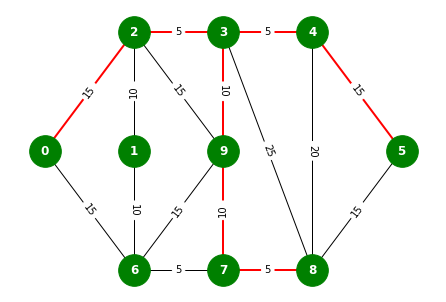

In [13]:

'''
  Lista de compras (sin orden), no se incluye 0 ya que esa se 
  considera la entrada
'''
shoppingList = [9, 5, 8, 2, 4]

'''
  Se encuentra el camino más corto desde la entrada para conseguir
  todos los productos de la lista de compras
'''
resultDistance, resultPath = shorterPath(sm1, shoppingList)

s_path_edges = getEdgesFromList(resultPath)

for edge in s_path_edges:
    G.add_edge(edge[0], edge[1], c = 'r', w = 2)

edges = G.edges()

c = []
w = []

for u, v in edges:
    if 'c' in G[u][v]:
        c.append(G[u][v]['c'])
        w.append(G[u][v]['w'])
    else:
        c.append('black')
        w.append(1)

# Mostramos el grafo con el camino más corto identificado
pos = nx.get_node_attributes(G, 'pos')

nx.draw(G, pos, with_labels = True, font_weight = 'bold', edge_color = c, width = w, node_color = 'green', font_color = 'white', node_size = 1000)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)

plt.show()
